In [1]:
%cd D:/SAME/Msc/5th semester/Pattern Recognition/HWs/HW4/Q8

D:\SAME\Msc\5th semester\Pattern Recognition\HWs\HW4\Q8


C:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


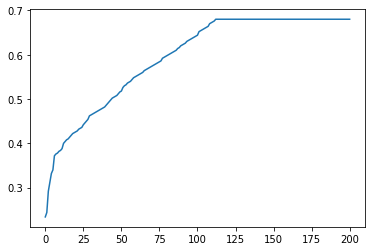

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 


def CCRCAL(test,decision):
    CCR1 = 0
    for j in range(len(decision)):
        if test[j][0] == decision[j]:
            CCR1 += 1
    return CCR1


train_data = pd.read_csv('trainData.csv')
test_data = pd.read_csv('testData.csv')

train_data = np.array(train_data[0:3000][:])
test_data = np.array(test_data[0:500][:])

train_label = pd.read_csv('trainLabels.csv')
test_label = pd.read_csv('testLabels.csv')

train_label = train_label[0:3000]
test_label = np.array(test_label[0:500])

#trainDataScaled = minmax_scale(train_data, feature_range=(0,1))
#TestDataScaled = minmax_scale(test_data, feature_range=(0,1))

GNB = GaussianNB()

selected_feat = 0
ccr = 0
N = 500
for i in range(784):
    GNB.fit(train_data[:,[i]],train_label.values.ravel())
    test_decision = GNB.predict(test_data[:,[i]])
    ccr2 = CCRCAL(test_label, test_decision)/N
    if ccr2>ccr:
        selected_feat=i
        ccr=ccr2
        

S_F = [selected_feat]
CCR = [ccr]
for j in range(200):
    M = list(range(784))
    for l in M:
        if l in S_F:
            continue
        else:    
            feat2 = S_F
            feat = np.concatenate((feat2,[l]))
            GNB.fit(train_data[:,feat],train_label.values.ravel())
            test_decision = GNB.predict(test_data[:,feat])
            ccr2 = CCRCAL(test_label, test_decision)/N
            if ccr2>CCR[j]:
                selected_feature2 = l
                ccr3 = ccr2
    S_F.append(selected_feature2)
    CCR.append(ccr3)
    
plt.plot(CCR)
plt.show()